In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
def handleSingleLine(line, containerDict) :
    line = line.strip()
    label = line[0:1]
    containerDict['label'].append(label)
    lineItems = line[2:].split()
    hasFtOne = False
    hasFtTwo = False
    hasFtThree = False
    hasFtFour = False
    for item in lineItems :
        tab = item.split(':')
        if tab[0] == '1' :
            containerDict['featureOne'].append(tab[1])
            hasFtOne = True
        elif tab[0] == '2' :
            containerDict['featureTwo'].append(tab[1])
            hasFtTwo = True
        elif tab[0] == '3' :
            containerDict['featureThree'].append(tab[1])
            hasFtThree = True
        else :
            containerDict['featureFour'].append(tab[1])
            hasFtFour = True
    
    if hasFtOne is False :
        containerDict['featureOne'].append(np.nan)
    if hasFtTwo is False :
        containerDict['featureTwo'].append(np.nan)
    if hasFtThree is False :
        containerDict['featureThree'].append(np.nan)
    if hasFtFour is False :
        containerDict['featureFour'].append(np.nan)

In [3]:
# Load the train data into a dataframe
trainDict = {
    'featureOne' : [],
    'featureTwo' : [],
    'featureThree' : [],
    'featureFour' : [], 
    'label' : []
}
trainDataPath = '../data/train.1'

with open(trainDataPath) as f:
    for line in f :
        handleSingleLine(line, trainDict)
        
dfRawTrain = pd.DataFrame(trainDict)
print(dfRawTrain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3089 entries, 0 to 3088
Data columns (total 5 columns):
featureOne      3089 non-null object
featureTwo      3089 non-null object
featureThree    3089 non-null object
featureFour     3089 non-null object
label           3089 non-null object
dtypes: object(5)
memory usage: 120.7+ KB
None


In [4]:
# Load the test data into a dataframe
testDict = {
    'featureOne' : [],
    'featureTwo' : [],
    'featureThree' : [],
    'featureFour' : [], 
    'label' : []
}
testDataPath = '../data/test.1'

with open(testDataPath) as f:
    for line in f :
        handleSingleLine(line, testDict)
        
dfRawTest = pd.DataFrame(testDict)
print(dfRawTest.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
featureOne      4000 non-null object
featureTwo      4000 non-null object
featureThree    4000 non-null object
featureFour     4000 non-null object
label           4000 non-null object
dtypes: object(5)
memory usage: 156.3+ KB
None


In [5]:
print("TRAINNING SET HEAD")
print(dfRawTrain.head())
print()
print("TRAINNING SET TAIL")
print(dfRawTrain.tail())
print()
print("TEST SET HEAD")
print(dfRawTest.head())
print()
print("TEST SET TAIL")
print(dfRawTest.tail())

TRAINNING SET HEAD
     featureOne    featureTwo   featureThree   featureFour label
0  2.617300e+01  5.886700e+01  -1.894697e-01  1.251225e+02     1
1  5.707397e+01  2.214040e+02   8.607959e-02  1.229114e+02     1
2  1.725900e+01  1.734360e+02  -1.298053e-01  1.250318e+02     1
3  2.177940e+01  1.249531e+02   1.538853e-01  1.527150e+02     1
4  9.133997e+01  2.935699e+02   1.423918e-01  1.605402e+02     1

TRAINNING SET TAIL
        featureOne    featureTwo   featureThree   featureFour label
3084  1.791730e+01  3.272930e+01   3.772986e-01  1.390780e+02     0
3085  1.776500e+01  1.379900e+01  -9.485000e-02  5.921447e+01     0
3086  2.391101e+01  3.890001e+01   4.704049e-01  1.257871e+02     0
3087  2.230670e+01  2.262220e+01   2.117224e-01  1.012818e+02     0
3088  1.640820e+01  3.920219e+01  -9.912787e-02  3.248707e+01     0

TEST SET HEAD
     featureOne    featureTwo   featureThree   featureFour label
0  4.236298e+00  2.198210e+01  -3.503797e-01  9.752163e+01     0
1  4.236298e+00  2

In [6]:
# Shuffle Training and Test Set
trainIndexes = np.arange(dfRawTrain.shape[0])
np.random.shuffle(trainIndexes)
dfTrain = dfRawTrain.iloc[trainIndexes]

testIndexes = np.arange(dfRawTest.shape[0])
np.random.shuffle(testIndexes)
dfTest = dfRawTest.iloc[testIndexes]

print("TRAINNING SET HEAD")
print(dfTrain.head())
print()
print("TRAINNING SET TAIL")
print(dfTrain.tail())
print()
print("TEST SET HEAD")
print(dfTest.head())
print()
print("TEST SET TAIL")
print(dfTest.tail())

TRAINNING SET HEAD
        featureOne    featureTwo   featureThree   featureFour label
2272  1.835700e+01  3.838000e+01   1.744659e-01  6.495491e+01     0
2384  7.816010e-01  2.970190e+01   2.652202e-01  4.810437e+01     0
841   2.456000e+02  4.280801e+02  -1.648455e-01  1.734026e+02     1
1525  2.681903e+01  1.432800e+02  -8.605335e-02  9.896910e+01     1
381   4.845502e+01  1.849370e+02  -2.076296e-01  1.218045e+02     1

TRAINNING SET TAIL
        featureOne    featureTwo   featureThree   featureFour label
586   2.384900e+01  1.527020e+02   2.881998e-01  1.480018e+02     1
1338  7.164999e+01  2.962580e+02  -1.669045e-01  1.572470e+02     1
2735  3.188995e+00  2.250499e+01   4.491070e-01  1.446537e+02     0
1579  9.372198e+01  4.476120e+02   1.867545e-01  1.591916e+02     1
2532  2.740005e+00  2.149600e+01   1.118989e-01  1.165942e+02     0

TEST SET HEAD
        featureOne    featureTwo   featureThree   featureFour label
3368  5.379300e+01  2.560870e+02  -7.330785e-02  1.370675e+02 

In [7]:
print(dfTrain.info())
print()
print(dfTest.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3089 entries, 2272 to 2532
Data columns (total 5 columns):
featureOne      3089 non-null object
featureTwo      3089 non-null object
featureThree    3089 non-null object
featureFour     3089 non-null object
label           3089 non-null object
dtypes: object(5)
memory usage: 144.8+ KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 3368 to 1063
Data columns (total 5 columns):
featureOne      4000 non-null object
featureTwo      4000 non-null object
featureThree    4000 non-null object
featureFour     4000 non-null object
label           4000 non-null object
dtypes: object(5)
memory usage: 187.5+ KB
None


In [8]:
# Convert feature to the right column
dfTrain.featureOne = dfTrain.featureOne.astype(np.float32)
dfTrain.featureTwo = dfTrain.featureTwo.astype(np.float32)
dfTrain.featureThree = dfTrain.featureThree.astype(np.float32)
dfTrain.featureFour = dfTrain.featureFour.astype(np.float32)
dfTrain.label = dfTrain.label.astype(np.int16)

dfTest.featureOne = dfTest.featureOne.astype(np.float32)
dfTest.featureTwo = dfTest.featureTwo.astype(np.float32)
dfTest.featureThree = dfTest.featureThree.astype(np.float32)
dfTest.featureFour = dfTest.featureFour.astype(np.float32)
dfTest.label = dfTest.label.astype(np.int16)

print(dfTrain.info())
print()
print(dfTest.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3089 entries, 2272 to 2532
Data columns (total 5 columns):
featureOne      3089 non-null float32
featureTwo      3089 non-null float32
featureThree    3089 non-null float32
featureFour     3089 non-null float32
label           3089 non-null int16
dtypes: float32(4), int16(1)
memory usage: 78.4 KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 3368 to 1063
Data columns (total 5 columns):
featureOne      4000 non-null float32
featureTwo      4000 non-null float32
featureThree    4000 non-null float32
featureFour     4000 non-null float32
label           4000 non-null int16
dtypes: float32(4), int16(1)
memory usage: 101.6 KB
None


In [9]:
# Change the Label 0 to -1 to match SVM format
indexesTrain = dfTrain.label == 0
dfTrain.label.loc[indexesTrain] = -1
indexesTest = dfTest.label == 0
dfTest.label.loc[indexesTest] = -1

print(dfTrain.head())
print()
print(dfTest.head())

      featureOne  featureTwo  featureThree  featureFour  label
2272   18.357000   38.380001      0.174466    64.954910     -1
2384    0.781601   29.701900      0.265220    48.104370     -1
841   245.600006  428.080109     -0.164845   173.402603      1
1525   26.819031  143.279999     -0.086053    98.969101      1
381    48.455021  184.936996     -0.207630   121.804497      1

      featureOne  featureTwo  featureThree  featureFour  label
3368   53.792999  256.087006     -0.073308   137.067505      1
1192   13.711000    7.515991      0.327393   133.598495     -1
1987   17.216000    6.549004      0.256474    67.803162     -1
641     0.404007   27.919010      0.159844    63.348129     -1
3409   58.311039  192.647995      0.224008   124.323196      1


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Text(0.5,1,'Test Set Label Bar Chart')

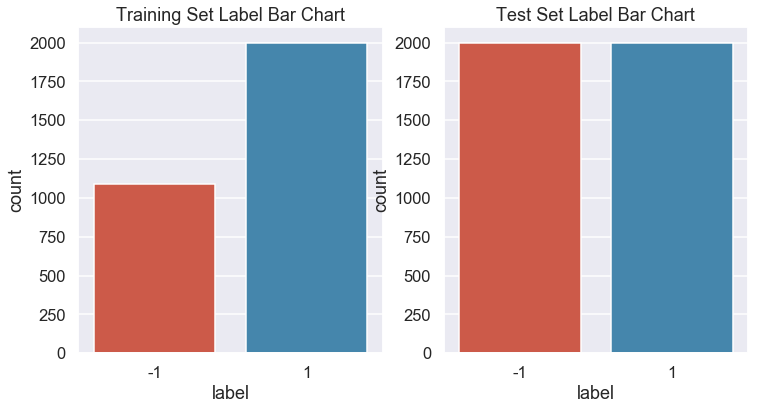

In [10]:
# DATA EXPLORATION
style.use('ggplot')
sns.set_context('talk')
sns.set_style("darkgrid")

#1- Bar Chart of the label
fig, arr = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.countplot(dfTrain.label, ax=arr[0])
arr[0].set_title('Training Set Label Bar Chart')
sns.countplot(dfTest.label, ax=arr[1])
arr[1].set_title('Test Set Label Bar Chart')

## We see that we don't have equal label distribution in the training set. We have more label 1 than label -1. 
## During the training the accuracy will not be a good metric to measure our model. We will use the F1-Score

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


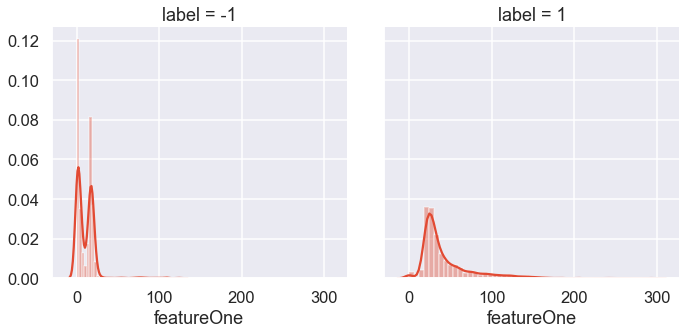

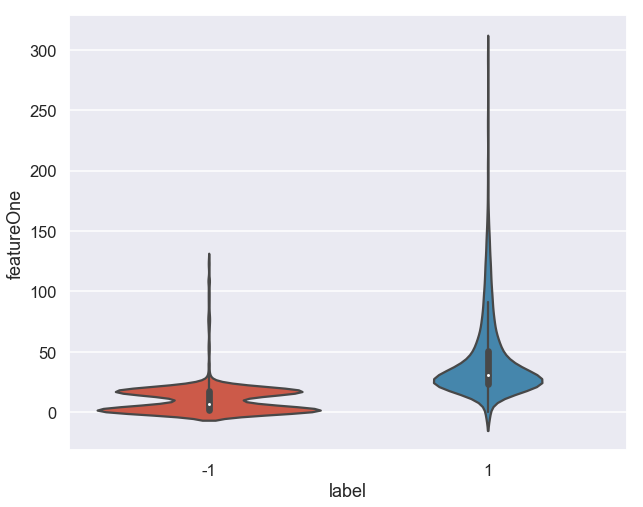

In [11]:
#2- View feature distribution per label type
def plotFeatureDistributionPerLabelType(featureName) :
    g = sns.FacetGrid(dfTrain, col='label', height=5)
    g.map(sns.distplot, featureName)
    plt.show()

    plt.figure(figsize=(10,8))
    ax = sns.violinplot(x='label', y=featureName, data=dfTrain)
    plt.show()
    
plotFeatureDistributionPerLabelType('featureOne')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


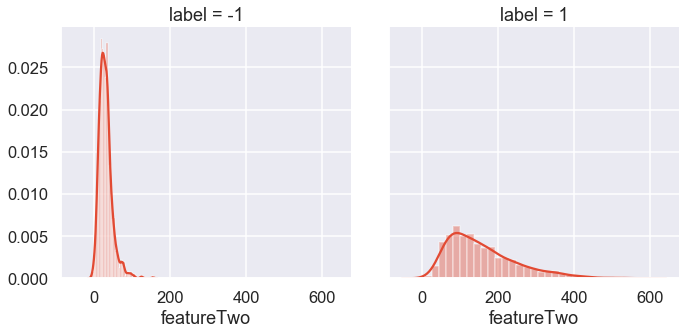

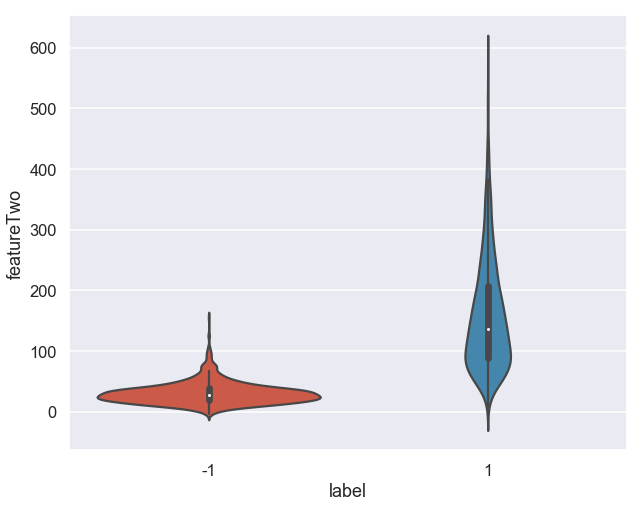

In [12]:
plotFeatureDistributionPerLabelType('featureTwo')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


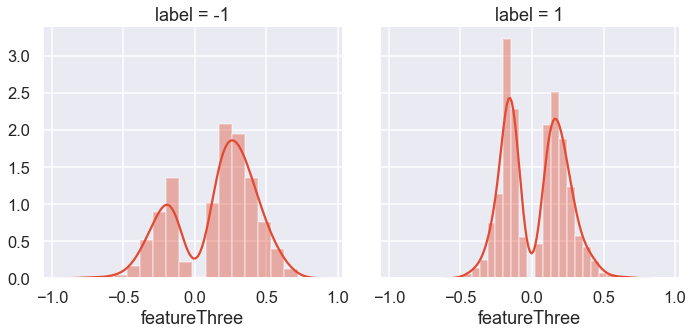

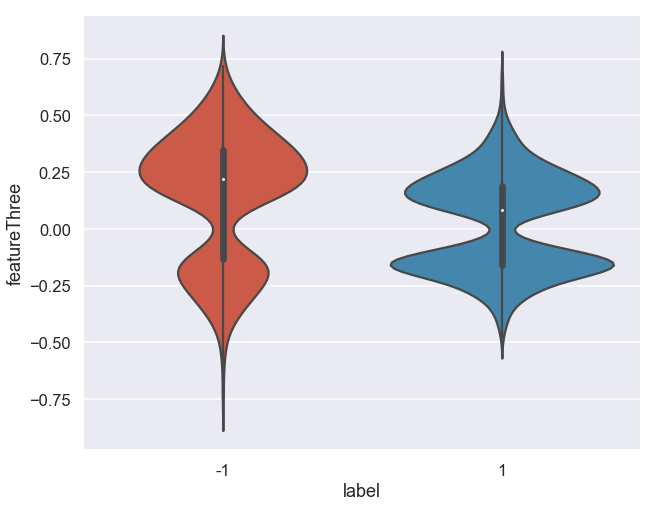

In [13]:
plotFeatureDistributionPerLabelType('featureThree')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


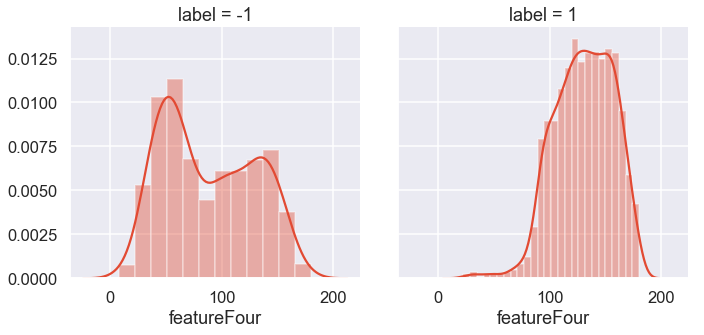

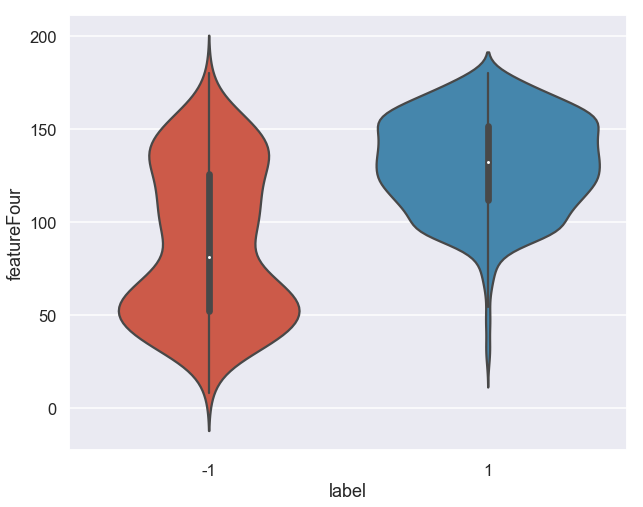

In [14]:
plotFeatureDistributionPerLabelType('featureFour')

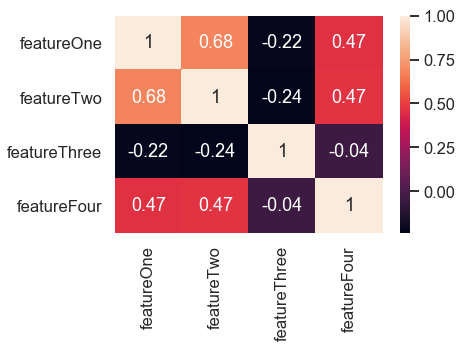

In [15]:
#Correlation plot to check if we have any two features that are highly correlated
corr = dfTrain[['featureOne', 'featureTwo', 'featureThree', 'featureFour']].corr()
sns.heatmap(corr, annot=True)

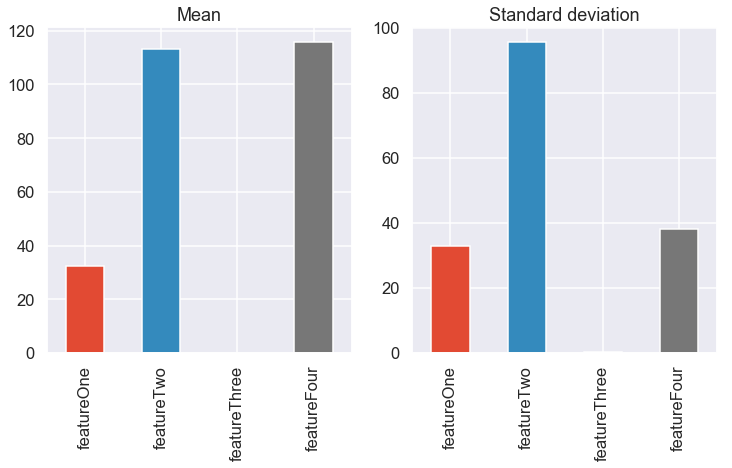

In [16]:
# SVM tends to perform well on a normalize dataset (mean=0 and standard deviation = 1).
fig, arr = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
dfTrain[['featureOne', 'featureTwo', 'featureThree', 'featureFour']].mean().plot.bar(ax=arr[0], title='Mean')
dfTrain[['featureOne', 'featureTwo', 'featureThree', 'featureFour']].std().plot.bar(ax=arr[1], title='Standard deviation')

In [17]:
scaler = StandardScaler()
dfTrain[['featureOne', 'featureTwo', 'featureThree', 'featureFour']] = scaler.fit_transform(dfTrain[['featureOne', 'featureTwo', 'featureThree', 'featureFour']])
dfTest[['featureOne', 'featureTwo', 'featureThree', 'featureFour']] = scaler.transform(dfTest[['featureOne', 'featureTwo', 'featureThree', 'featureFour']])

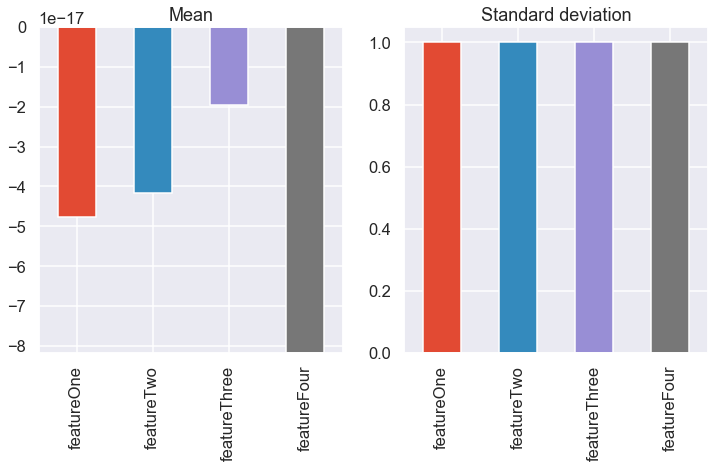

In [18]:
fig, arr = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
dfTrain[['featureOne', 'featureTwo', 'featureThree', 'featureFour']].mean().plot.bar(ax=arr[0], title='Mean')
dfTrain[['featureOne', 'featureTwo', 'featureThree', 'featureFour']].std().plot.bar(ax=arr[1], title='Standard deviation')

In [19]:
dfTrain.to_pickle('../data/dfTrain.pickle')
dfTest.to_pickle('../data/dfTest.pickle')
print('Data saved')

Data saved
